## 1. Librerias y configuraciones previas

In [1]:
import os
import sys

In [2]:
# Agregar el directorio raíz del proyecto al PYTHONPATH
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Sube un nivel
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)
print(f"Directorio raíz del proyecto agregado al PYTHONPATH: {ROOT_DIR}")

Directorio raíz del proyecto agregado al PYTHONPATH: c:\Users\Usuario\Documents\UdeA\especializacion\repos\monografia


In [3]:
# ==============================================================================
import pandas as pd
import numpy as np

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal

In [4]:
# se importan las rutas
from globals import SRC_DIR, DATA_DIR, RAW_DATA_DIR, PROCESSED_DATA_DIR
# Agregar el directorio SRC_DIR al PYTHONPATH
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

## 2. Funciones

In [5]:
from data_ingestion import FEATURES, load_all_mat_files, load_mat_file, get_signal_data_by_features
from data_preprocessing import num_index, segment_signal, standardize_signal, normalize_signal, detect_level_changes, calculate_rms, apply_filter_to_dataframe
#, calculate_mean, calculate_std, calculate_median, calculate_iqr, calculate_min_max, calculate_skewness, calculate_kurtosis, calculate_entropy, calculate_energy, calculate_snr, calculate_crest_factor, calculate_peak_factor, calculate_shape_factor, calculate_impulse_factor, calculate_margin_factor
from visualization import graficar_medida1, graficar_medida2



c:\Users\Usuario\Documents\UdeA\especializacion\repos\monografia\data\raw


## 3. Carga del dataset original

In [6]:
signal_data = load_mat_file(RAW_DATA_DIR,'S1_A1_E1.mat')
signal_data.keys()
FEATURES

['emg', 'repetition', 'restimulus']

In [7]:
signal_data_df = get_signal_data_by_features(signal_data, FEATURES)
signal_data_df.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,repetition,restimulus
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,0,0
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,0,0
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,0,0


In [8]:
mascara_emg = signal_data_df.columns.str.contains('emg')
signal_data_emg_df = signal_data_df.loc[:,mascara_emg]

signal_data_repetition_df = signal_data_df[['repetition']]

signal_data_restimulus_df = signal_data_df[['restimulus']]

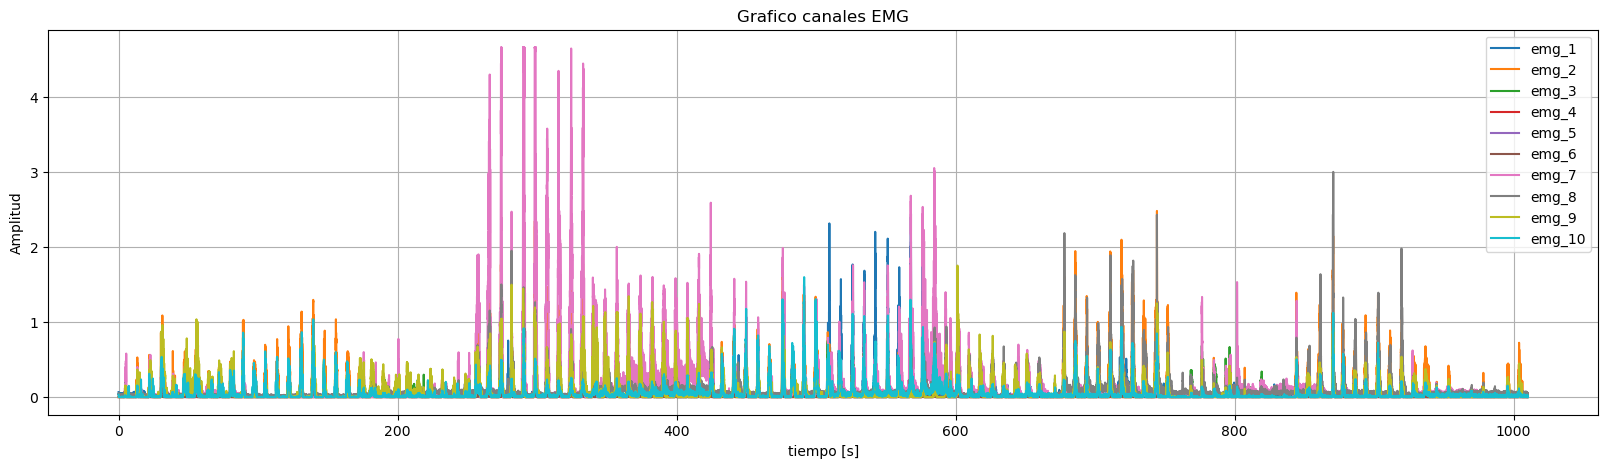

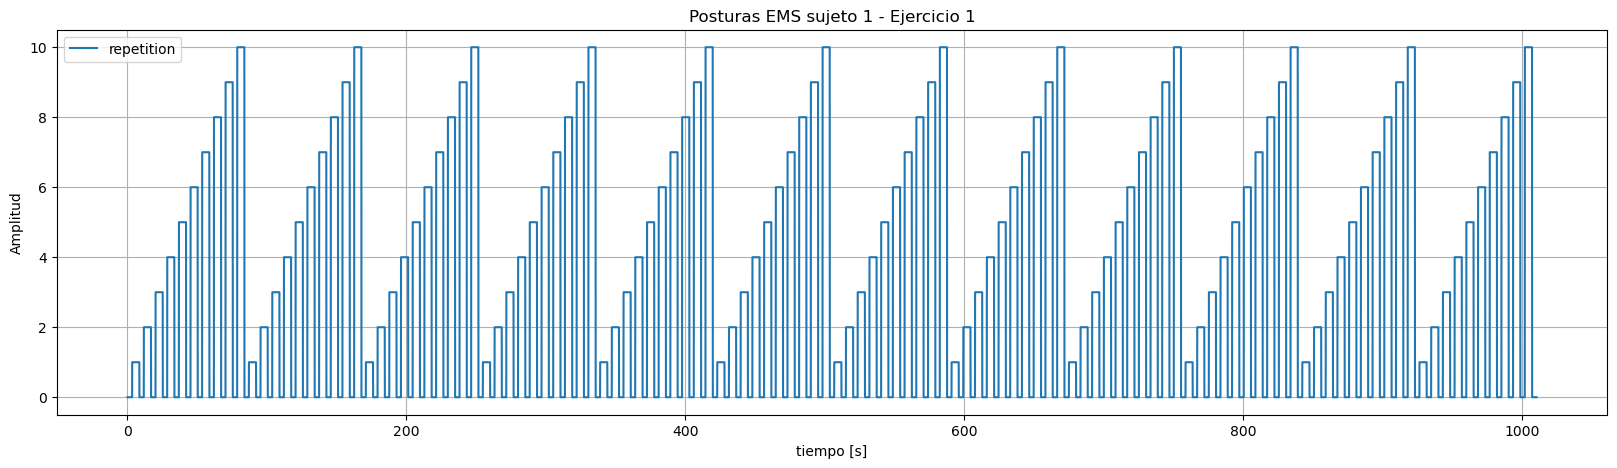

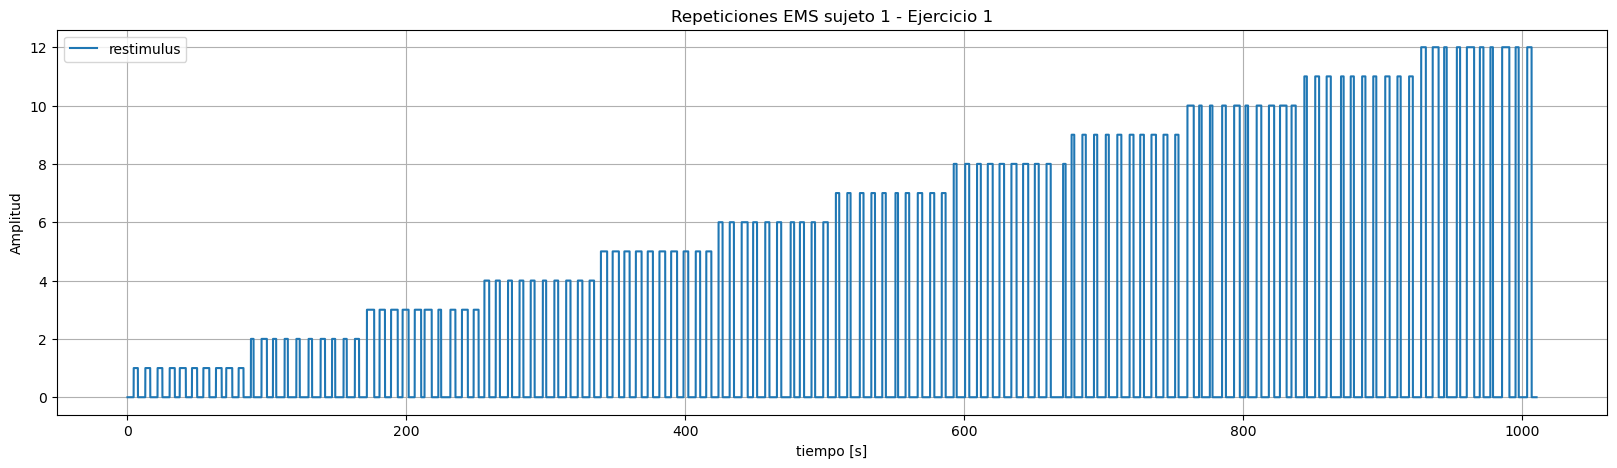

In [9]:
graficar_medida1(signal_data_emg_df,
                     columnas = signal_data_emg_df.columns,
                     titulo = "Grafico canales EMG",
                     # etiqueta_x="n",
                     fs = 100,
                     #etiqueta_y="Amplitud"
                     )

graficar_medida1(signal_data_repetition_df, 
                 columnas=signal_data_repetition_df.columns, 
                 fs = 100,
                 titulo = "Posturas EMS sujeto 1 - Ejercicio 1")

graficar_medida1(signal_data_restimulus_df,
                columnas=signal_data_restimulus_df.columns, 
                fs = 100,
                titulo = "Repeticiones EMS sujeto 1 - Ejercicio 1")

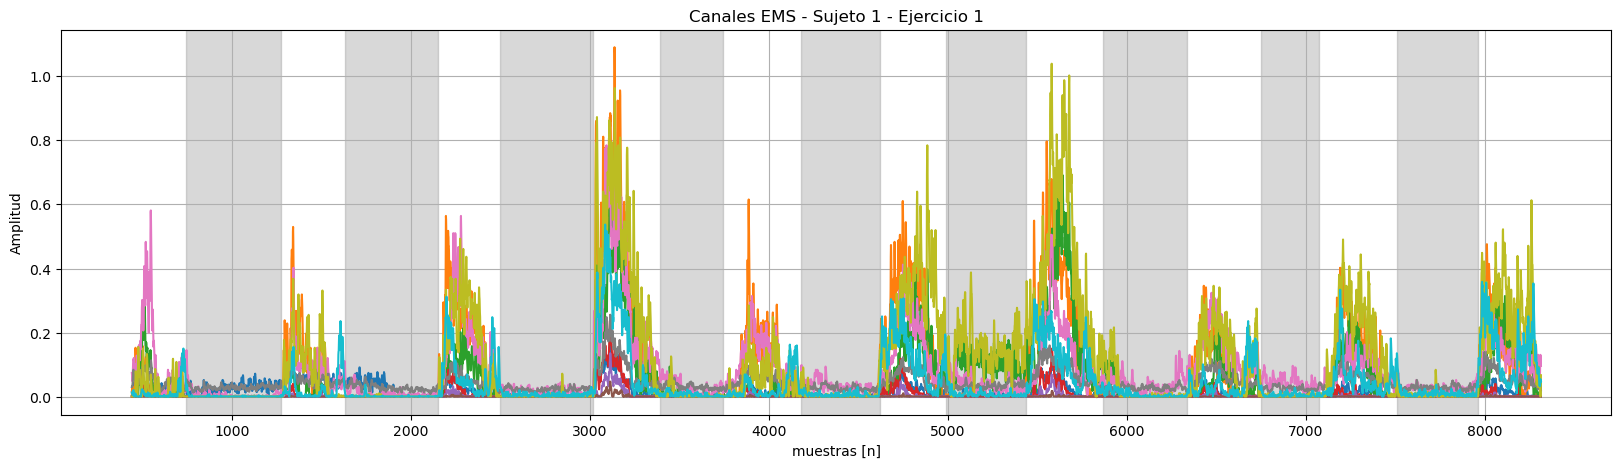

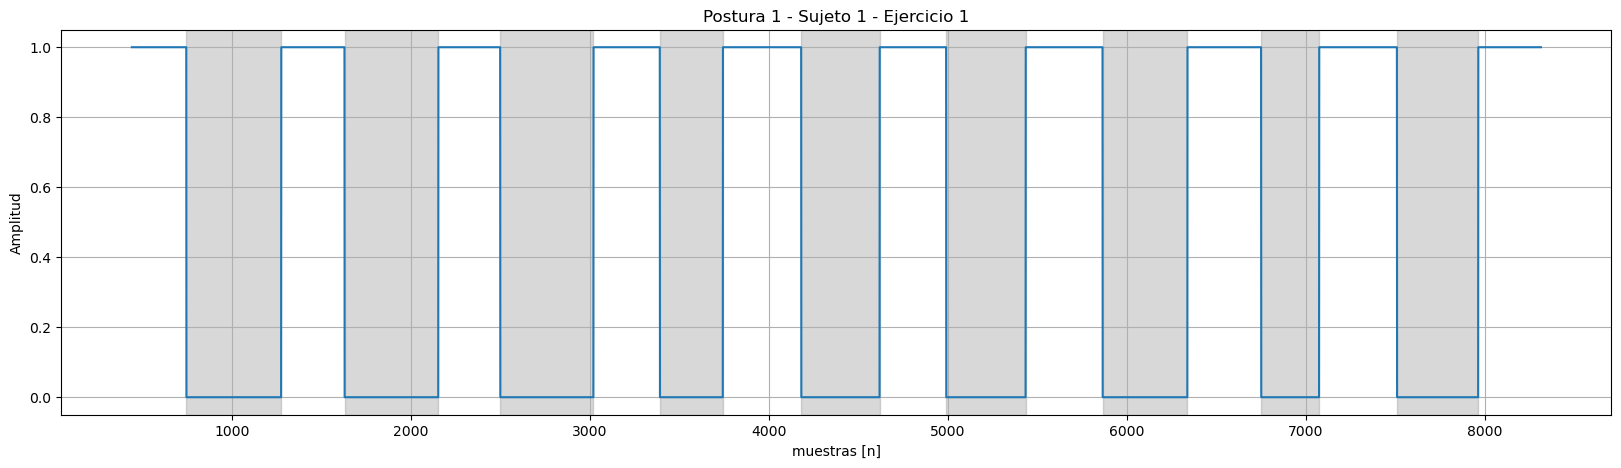

In [10]:
# Funciones sobre las señales

graficar_medida2(signal_data_df, 
                 columnas = signal_data_df.columns[0:10], 
                 labels = signal_data_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(signal_data_df, 
                 columnas = ['restimulus'], 
                 labels = signal_data_restimulus_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

## Señales EMG

In [11]:
signal_data_emg_df.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146


### Filtrado

In [12]:
signal_data_emg_df_filt =  apply_filter_to_dataframe(signal_data_emg_df)


In [13]:
signal_data_emg_df_filt.head()


,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192
1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820
2,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452
3,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091
4,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743


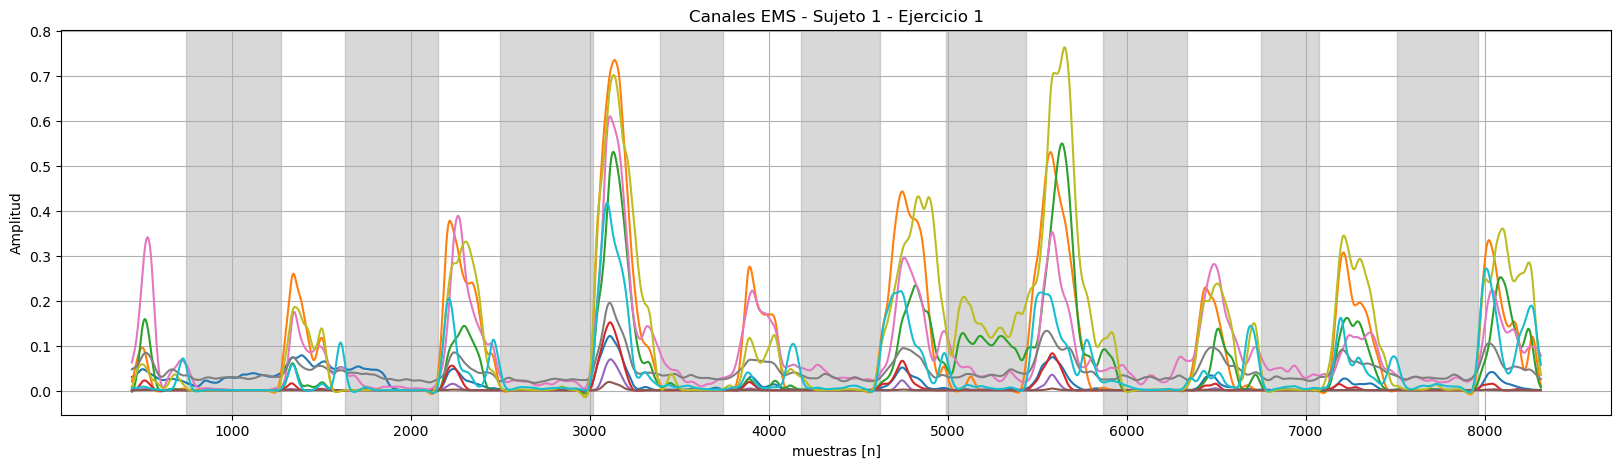

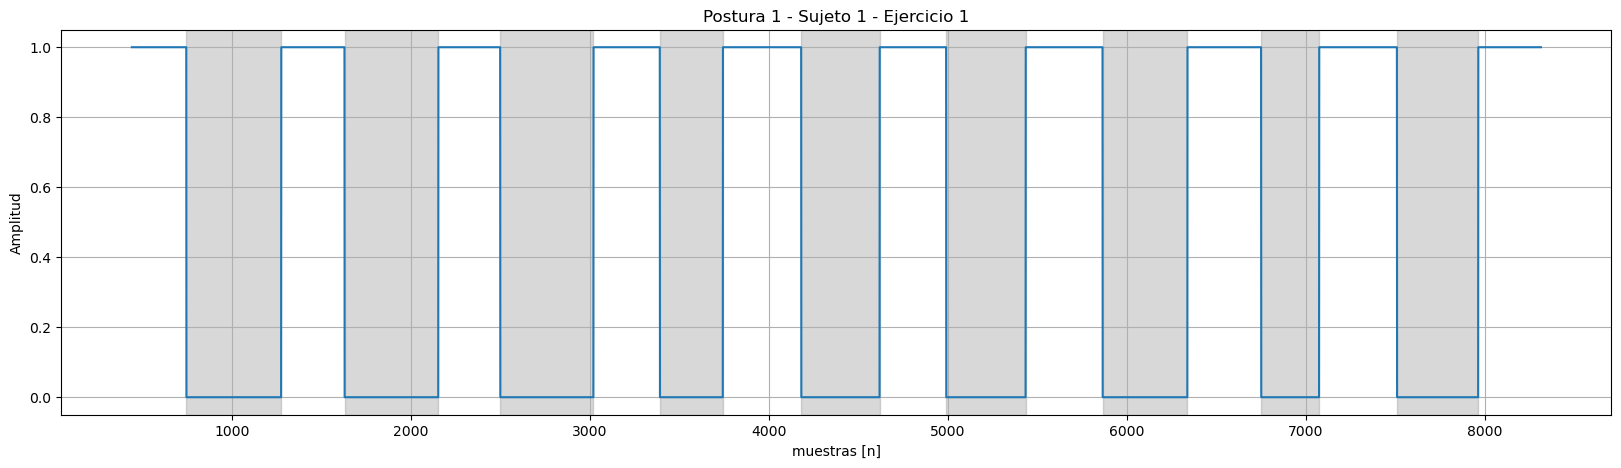

In [15]:
graficar_medida2(signal_data_emg_df_filt, 
                 columnas = signal_data_emg_df_filt, 
                 labels = signal_data_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(signal_data_df, 
                 columnas = ['restimulus'], 
                 labels = signal_data_restimulus_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

### Segmentacion

## Notebook de exploración de datos

1. https://github.com/repos-especializacion-UdeA/trabajo-final_AA1/blob/main/notebooks_pasos_previos/00_preprocesamiento_dataset_clasificacion.ipynb
2. https://github.com/repos-especializacion-UdeA/EDA_ninapro_DB1/tree/main
---

1. Carga del dataset desde data/raw/
2. Limpieza de datos usando funciones de src/features/
3. Estadísticas descriptivas y visualizaciones